In [3]:
import keras

### The IMDB dataset: a binary classification example

In [4]:
# loading the IMDB dataset, packaged with Keras
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 5s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
# restriction to the top 10000 most frequent words
max([max(sequence) for sequence in train_data])

9999

In [8]:
# decoding reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
# encoding the integer sequences via one-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# vectorizing the labels too
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
# building the model
from keras import models, layers

In [17]:
# model definition
from tensorflow import keras
model = keras.Sequential([
layers.Dense(16, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

In [ ]:
# the formula shows the chain of tensor operations implemented by a 'Dense' layer with 'relu' activation
output = relu(dot(W, input) + b)

In [19]:
# compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [20]:
# setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
# training the model
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5053 - acc: 0.7843 - val_loss: 0.3768 - val_acc: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2958 - acc: 0.9013 - val_loss: 0.3103 - val_acc: 0.8798
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2157 - acc: 0.9282 - val_loss: 0.3192 - val_acc: 0.8712
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1695 - acc: 0.9450 - val_loss: 0.3147 - val_acc: 0.8727
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1393 - acc: 0.9537 - val_loss: 0.2832 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1131 - acc: 0.9650 - val_loss: 0.3152 - val_acc: 0.8785
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0960 - acc: 0.9714 - val_loss: 0.3156 - val_acc: 0.8819
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0793 - a

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

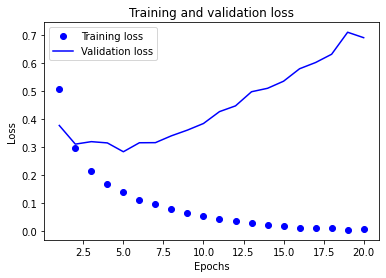

In [23]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

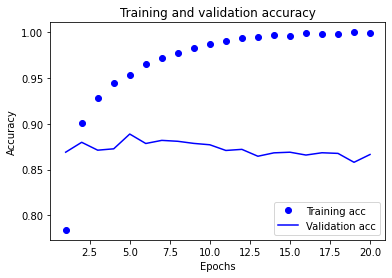

In [24]:
# plotting the training and validation accuracy
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# retraining a model from scratch
model = keras.Sequential([
layers.Dense(16, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4528 - accuracy: 0.8168
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2601 - accuracy: 0.9087
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1986 - accuracy: 0.9301
Epoch 4/4
782/782 [==============================] - 1s 725us/step - loss: 0.2938 - accuracy: 0.8826


In [26]:
results

[0.29380157589912415, 0.8826000094413757]

In [28]:
# using a trained model to generate predictions on new data
model.predict(x_test)

array([[0.15278599],
       [0.9989789 ],
       [0.9125035 ],
       ...,
       [0.11579752],
       [0.06099507],
       [0.61253893]], dtype=float32)

### The Reuters dataset: a multiclass classification example

In [29]:
# loading the Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [30]:
len(train_data)

8982

In [31]:
len(test_data)

2246

In [32]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [33]:
# decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [34]:
train_labels[10]

3

In [35]:
# encoding the inut data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
# encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [37]:
# or built-in way to encode the labels in Keras
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [38]:
# model definition
model = keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(46, activation='softmax')
])

In [39]:
# compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [40]:
# setting aside a validation set 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
# training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.7406 - accuracy: 0.5385 - val_loss: 1.7667 - val_accuracy: 0.6620
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4411 - accuracy: 0.7120 - val_loss: 1.3141 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0608 - accuracy: 0.7774 - val_loss: 1.1468 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8381 - accuracy: 0.8255 - val_loss: 1.0407 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6644 - accuracy: 0.8619 - val_loss: 0.9766 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5248 - accuracy: 0.8908 - val_loss: 0.9374 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4221 - accuracy: 0.9117 - val_loss: 0.9021 - val_accuracy: 0.8130
Epoch 8/20
16

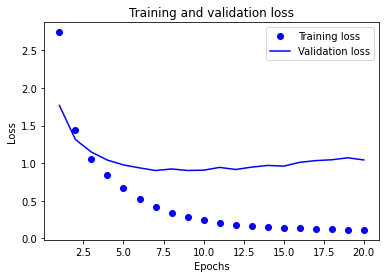

In [42]:
# plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

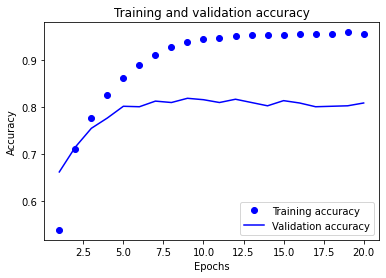

In [43]:
# plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
# retraining a model from scratch
model = keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 20ms/step - loss: 2.8168 - accuracy: 0.4650 - val_loss: 1.8474 - val_accuracy: 0.6090
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4723 - accuracy: 0.6936 - val_loss: 1.3233 - val_accuracy: 0.7000
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0484 - accuracy: 0.7756 - val_loss: 1.1279 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8188 - accuracy: 0.8286 - val_loss: 1.0373 - val_accuracy: 0.7730
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6541 - accuracy: 0.8649 - val_loss: 0.9923 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5280 - accuracy: 0.8929 - val_loss: 0.9482 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4247 - accuracy: 0.9157 - val_loss: 0.9051 - val_accuracy: 0.8200
Epoch 8/9
16/16 [===

In [45]:
results

[1.049302577972412, 0.7791629433631897]

In [46]:
# accuracy of a random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1923419412288513

In [47]:
# generating predictions on new data
predictions = model.predict(x_test)

In [48]:
predictions[0].shape

(46,)

In [49]:
np.sum(predictions[0])

1.0

In [50]:
# the class with the highest probability 
np.argmax(predictions[0])

3

In [51]:
# different way to handle labels and loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
# with integer labels, 'sparse_categorical_crossentropy' can be used
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [53]:
# model with an information bottleneck
model = keras.Sequential([
layers.Dense(64, activation='relu'),
layers.Dense(4, activation='relu'),
layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 2.8217 - accuracy: 0.3544 - val_loss: 2.2347 - val_accuracy: 0.4060
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.9633 - accuracy: 0.4301 - val_loss: 1.8144 - val_accuracy: 0.4260
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5665 - accuracy: 0.5640 - val_loss: 1.5800 - val_accuracy: 0.6110
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3297 - accuracy: 0.6630 - val_loss: 1.4881 - val_accuracy: 0.6290
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1966 - accuracy: 0.6809 - val_loss: 1.4302 - val_accuracy: 0.6510
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0992 - accuracy: 0.6983 - val_loss: 1.4104 - val_accuracy: 0.6570
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0148 - accuracy: 0.7340 - val_loss: 1.3996 - val_accuracy: 0.6890
Epoch 8/20
63/63 [

### The Boston Housing Price dataset

In [54]:
# loading the dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [55]:
train_data.shape

(404, 13)

In [56]:
test_data.shape

(102, 13)

In [57]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [58]:
# normaliziong the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [60]:
# model definition
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [61]:
# K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #%d' % i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [62]:
all_scores

[1.9863941669464111, 2.301236391067505, 2.982057571411133, 2.552417516708374]

In [63]:
np.mean(all_scores)

2.4555264115333557

In [64]:
# saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #%d' % i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [65]:
# building the history of successive mean-K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

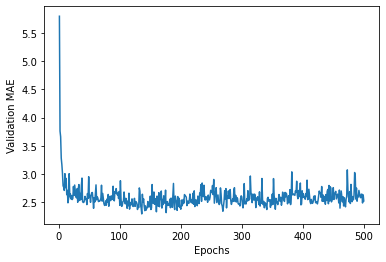

In [66]:
# plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

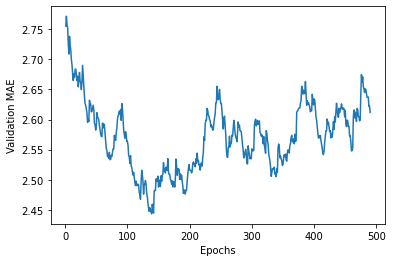

In [67]:
# plotting smoothed validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [1]:
# training the final model
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

NameError: name 'build_model' is not defined

In [69]:
test_mae_score

2.6923115253448486

In [70]:
# generating predictions on new data
predictions = model.predict(test_data)
predictions[0]

array([8.513166], dtype=float32)